# **Entregable Final - Herramientas Computacionales el arte de la analitica**

**Jhonatan Yael Martínez Vargas - A01734193**

**Luis Adrián Díaz Santana González - A01734193**

**Francisco Antonio López Ricardez -A01737275**

---

### **Paso 01 - Leer la base de datos**

In [2]:
import pandas as pd
import seaborn as sns
from kneed import KneeLocator
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Ulabox_df = pd.read_csv("ulabox_orders_with_categories_partials_2017.csv")
Ulabox_df

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
0,0,0,45,23.03,4,13,9.46,87.06,3.48,0.00,0.00,0.00,0.0,0.0
1,0,1,38,1.22,5,13,15.87,75.80,6.22,2.12,0.00,0.00,0.0,0.0
2,0,2,51,18.08,4,13,16.88,56.75,3.37,16.48,6.53,0.00,0.0,0.0
3,1,3,57,16.51,1,12,28.81,35.99,11.78,4.62,2.87,15.92,0.0,0.0
4,1,4,53,18.31,2,11,24.13,60.38,7.78,7.72,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,10235,29995,4,0.00,5,10,5.80,0.00,51.30,0.00,0.00,0.00,0.0,42.9
29996,10236,29996,1,0.00,7,21,0.00,0.00,0.00,0.00,100.00,0.00,0.0,0.0
29997,10237,29997,54,0.00,4,17,9.25,0.00,77.48,13.27,0.00,0.00,0.0,0.0
29998,10237,29998,10,0.00,5,10,0.00,0.00,100.00,0.00,0.00,0.00,0.0,0.0


---

### **Paso 02 - Separar y mostrar**

In [3]:
customer_df = Ulabox_df[['customer']]
customer_df

,customer
0,0
1,0
2,0
3,1
4,1
...,...
29995,10235
29996,10236
29997,10237
29998,10237


In [4]:
total_items_df = Ulabox_df[['total_items']]
total_items_df

,total_items
0,45
1,38
2,51
3,57
4,53
...,...
29995,4
29996,1
29997,54
29998,10


In [5]:
disconut_df = Ulabox_df[['discount%']]
disconut_df

,discount%
0,23.03
1,1.22
2,18.08
3,16.51
4,18.31
...,...
29995,0.00
29996,0.00
29997,0.00
29998,0.00


In [6]:
date_df = Ulabox_df[['weekday', 'hour']]
date_df

,weekday,hour
0,4,13
1,5,13
2,4,13
3,1,12
4,2,11
...,...,...
29995,5,10
29996,7,21
29997,4,17
29998,5,10


In [7]:
departments_df = Ulabox_df[['Food%', 'Fresh%', 'Drinks%', 'Home%', 'Beauty%', 'Health%', 'Baby%', 'Pets%']]
departments_df

,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
0,9.46,87.06,3.48,0.00,0.00,0.00,0.0,0.0
1,15.87,75.80,6.22,2.12,0.00,0.00,0.0,0.0
2,16.88,56.75,3.37,16.48,6.53,0.00,0.0,0.0
3,28.81,35.99,11.78,4.62,2.87,15.92,0.0,0.0
4,24.13,60.38,7.78,7.72,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...
29995,5.80,0.00,51.30,0.00,0.00,0.00,0.0,42.9
29996,0.00,0.00,0.00,0.00,100.00,0.00,0.0,0.0
29997,9.25,0.00,77.48,13.27,0.00,0.00,0.0,0.0
29998,0.00,0.00,100.00,0.00,0.00,0.00,0.0,0.0


---

**Paso 03 - Analisis para los clientes**

In [21]:
# Frecuencia de compra por cada cliente
customer_frecc = customer_df.pivot_table(columns = ['customer'], aggfunc = 'size')


customer
0         3
1        20
2         1
3        23
4        29
         ..
10234     1
10235     1
10236     1
10237     2
10238     1
Length: 10239, dtype: int64

In [24]:
print(customer_frec.max())

52


---

**Paso 04 - Analiss de los productos**

<Axes: >

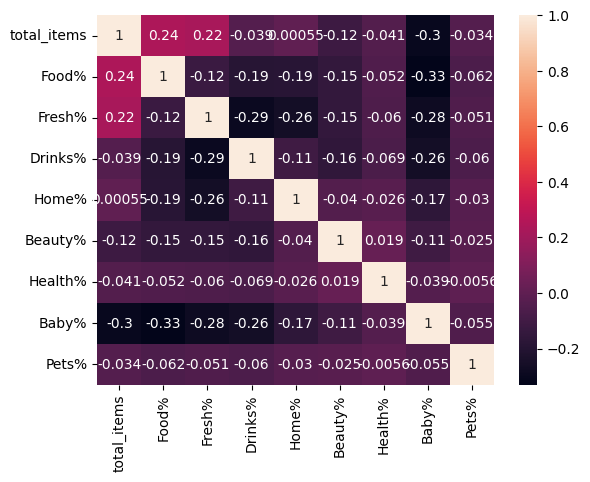

In [26]:
sns.heatmap(Ulabox_df[['total_items', 'Food%', 'Fresh%', 'Drinks%', 'Home%', 'Beauty%', 'Health%', 'Baby%', 'Pets%']].corr(), annot=True)